In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [4]:
df = pd.read_csv("data 2.csv")





In [5]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [6]:
col = ['id','Unnamed: 32']
df = df.drop(col,axis=1)

<ipython-input-12-11153b487bc5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True,fmt='.1f',cmap='Blues')


<Axes: >

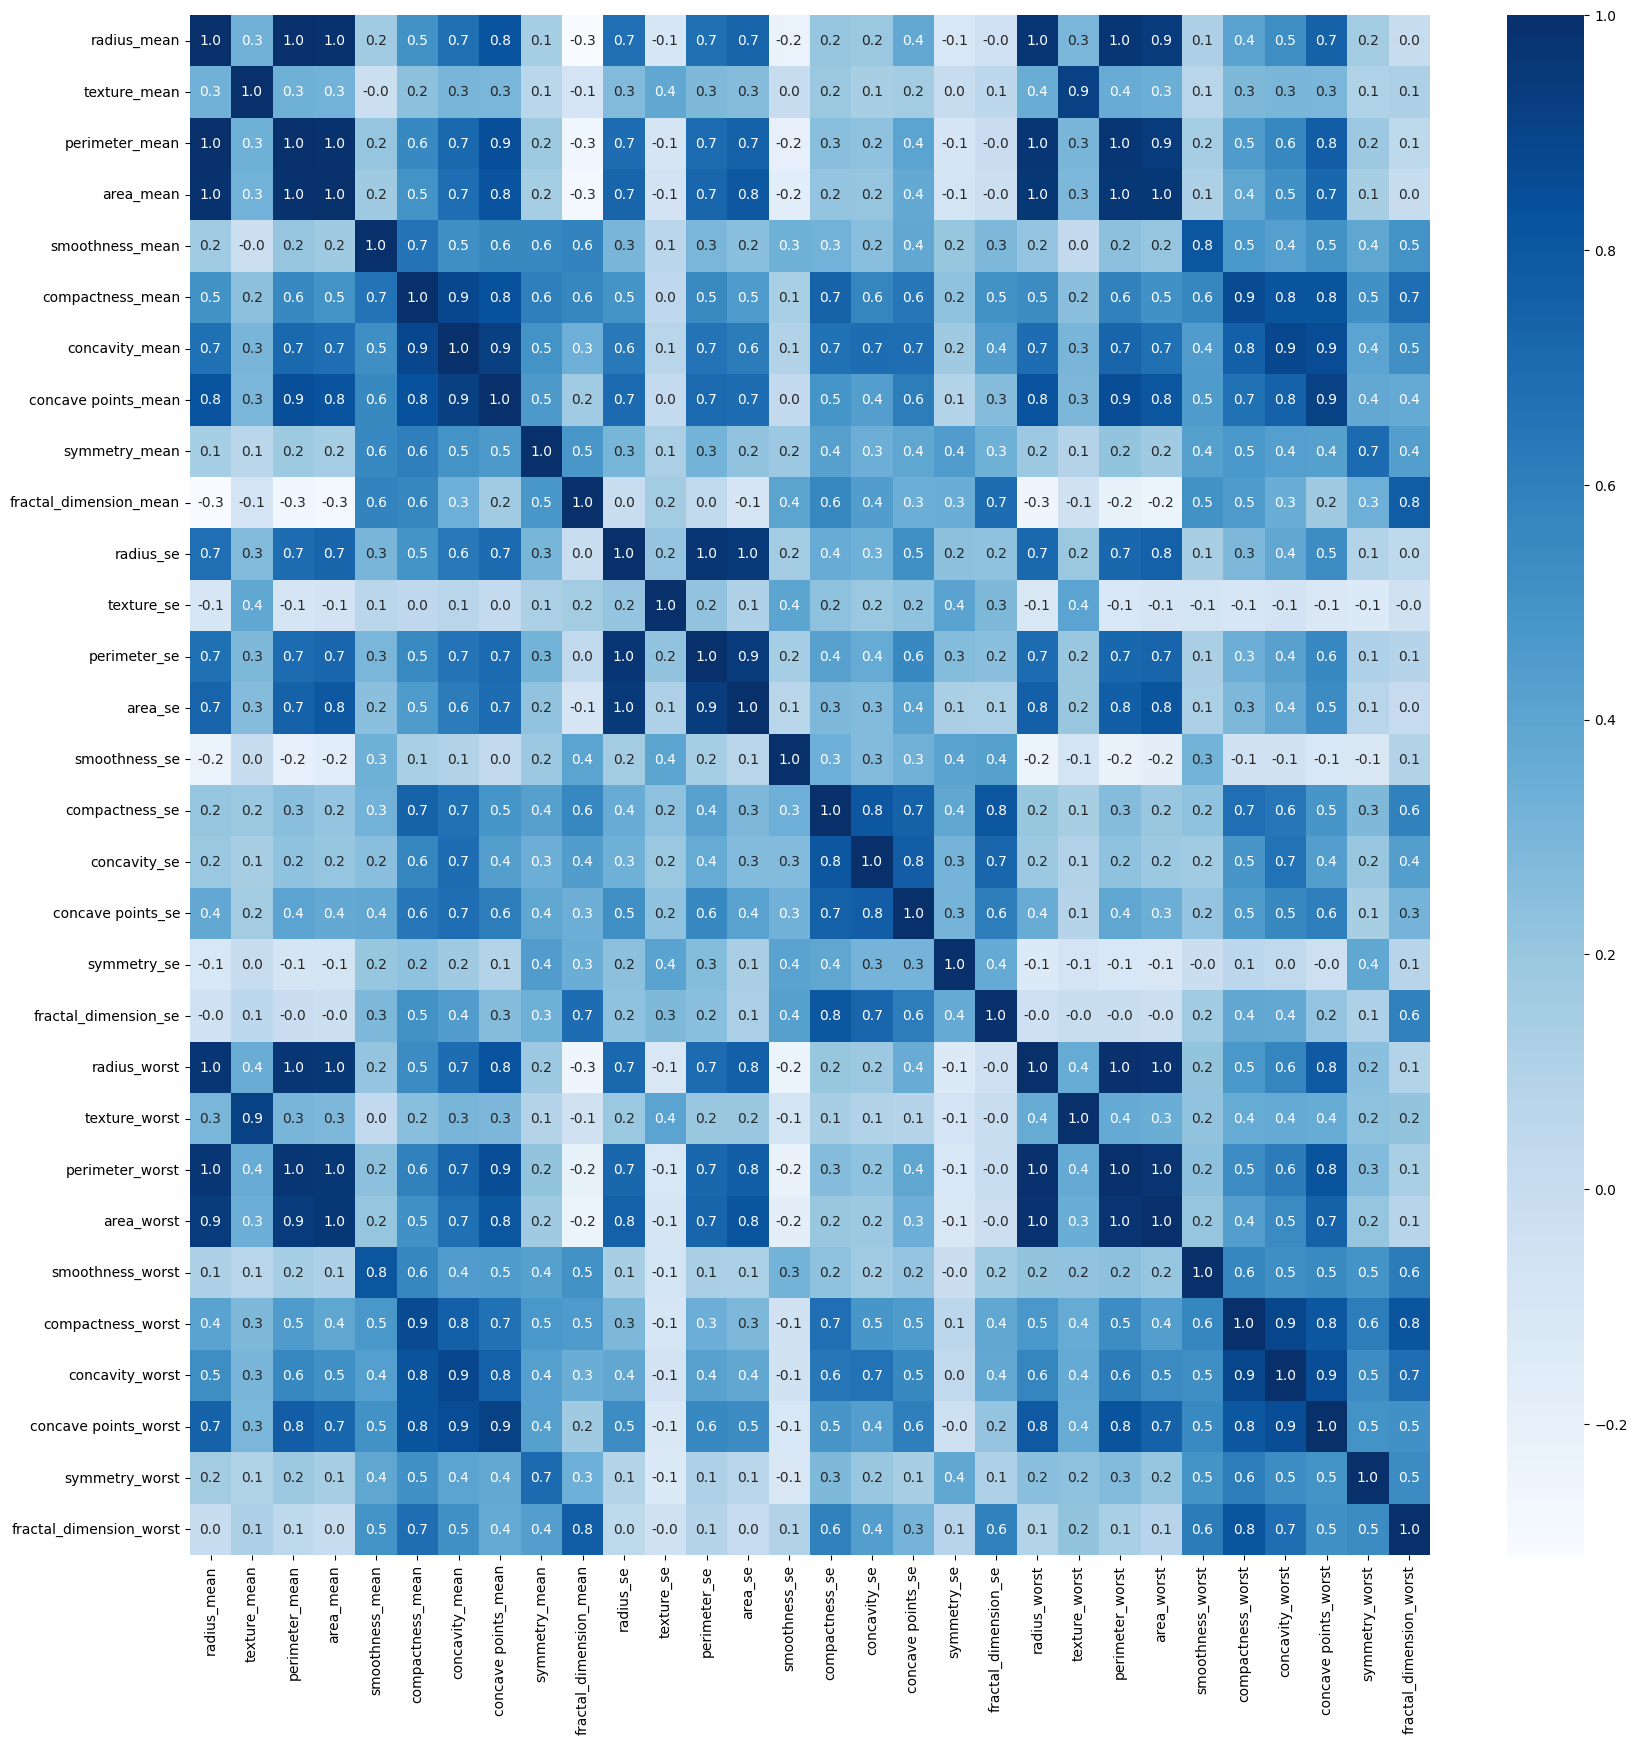

In [12]:
#visualisation
plt.rcParams['figure.figsize'] = (20,20)
sns.heatmap(data=df.corr(),annot=True,fmt='.1f',cmap='Blues')

<ipython-input-13-6ef2becd2386>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.subplot().set_xticklabels(["Malignant", "Benign"])


[Text(0, 0, 'Malignant'), Text(1, 0, 'Benign')]

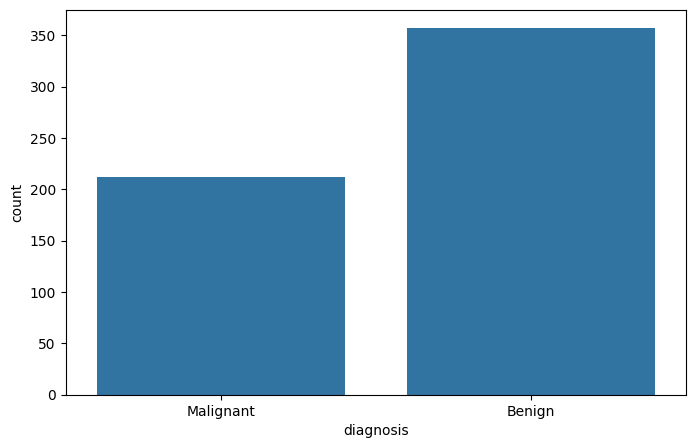

In [13]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x="diagnosis", data=df)
plt.subplot().set_xticklabels(["Malignant", "Benign"])

In [14]:
B,M = df['diagnosis'].value_counts()
print(f"Benign = {B}, Malignant = {M}")

Benign = 357, Malignant = 212


In [16]:
lb = LabelEncoder()
df['diagnosis'] = lb.fit_transform(df['diagnosis'])

In [18]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [19]:
X.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [20]:
#training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [22]:
X_train.shape

(455, 30)

In [24]:
#ANN Design

ann_model = Sequential()

#1st Hidden Layer
ann_model.add(Dense(16, kernel_initializer='uniform', activation='relu', input_dim = 30))

#2nd Hidden Layer
ann_model.add(Dense(16, kernel_initializer='uniform', activation='relu'))

#Output Layer
ann_model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [25]:
#model compile
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# training the model
ann_model.fit(X_train, y_train, batch_size=100, epochs=150, validation_split=0.2)

Epoch 1/150
4/4 [==============================] - 1s 63ms/step - loss: 0.6922 - accuracy: 0.7473 - val_loss: 0.6914 - val_accuracy: 0.6923
Epoch 2/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6905 - accuracy: 0.6923 - val_loss: 0.6895 - val_accuracy: 0.6923
Epoch 3/150
4/4 [==============================] - 0s 8ms/step - loss: 0.6881 - accuracy: 0.7115 - val_loss: 0.6870 - val_accuracy: 0.7582
Epoch 4/150
4/4 [==============================] - 0s 8ms/step - loss: 0.6849 - accuracy: 0.7445 - val_loss: 0.6834 - val_accuracy: 0.7802
Epoch 5/150
4/4 [==============================] - 0s 8ms/step - loss: 0.6807 - accuracy: 0.8242 - val_loss: 0.6785 - val_accuracy: 0.8571
Epoch 6/150
4/4 [==============================] - 0s 9ms/step - loss: 0.6750 - accuracy: 0.8736 - val_loss: 0.6718 - val_accuracy: 0.8901
Epoch 7/150
4/4 [==============================] - 0s 9ms/step - loss: 0.6673 - accuracy: 0.8984 - val_loss: 0.6629 - val_accuracy: 0.9231
Epoch 8/150
4/4 [========

In [27]:
#testing ANN
y_pred = ann_model.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 2ms/step


In [28]:
loss, accuracy = ann_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.1271 - accuracy: 0.9474


In [29]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[64,  3],
       [ 3, 44]])

In [30]:
y_pred_1 = ann_model.predict(X_test)

# AUC score
auc_score = roc_auc_score(y_test, y_pred_1)

print("AUC Score:", auc_score)

4/4 [==============================] - 0s 3ms/step
AUC Score: 0.989838043823436


In [32]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
history = ann_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stop])

Epoch 1/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0419 - accuracy: 0.9868 - val_loss: 0.1272 - val_accuracy: 0.9474
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9868 - val_loss: 0.1239 - val_accuracy: 0.9474
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9890 - val_loss: 0.1241 - val_accuracy: 0.9561
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9890 - val_loss: 0.1234 - val_accuracy: 0.9561
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0369 - accuracy: 0.9912 - val_loss: 0.1217 - val_accuracy: 0.9561
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9912 - val_loss: 0.1230 - val_accuracy: 0.9561
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9912 - val_loss: 0.1217 - val_accuracy: 0.9561
Epoch 8/100
1

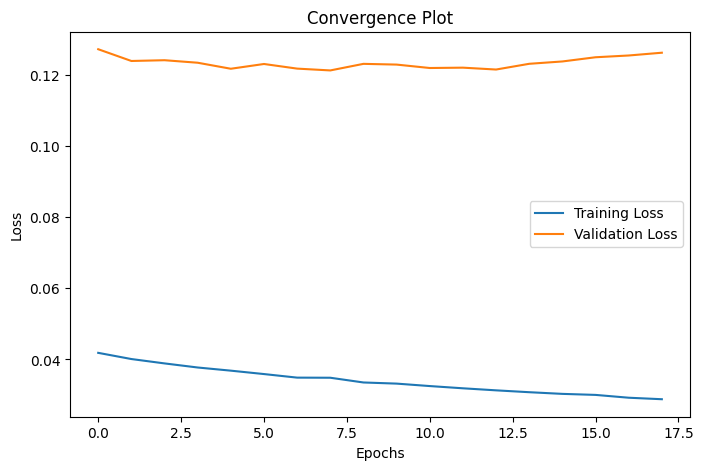

In [33]:
# plot the training and validation loss over the epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Convergence Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()